In [1]:
import numpy as np
from pprint import pprint

# Gensim: Topic modeling for humans

https://radimrehurek.com/gensim/index.html

```bash
conda install --channel conda-forge gensim
```

<div class="alert alert-info"><tt>gensim</tt>의 핵심 개념은 다음과 같다.</div>

  1. __도큐먼트__(document): 글, 문서
  2. __코퍼스__(corpus): 도큐먼트 <u>모음</u>(collection)
  3. __벡터__(vector): 도큐먼트를 두 숫자 `(id, value)`들의 시퀀스로 <u>표현</u>(representation)한 것
  4. __모델__(model): 벡터를 다른 형태의 벡터로 <u>변환</u>(transform)하는 알고리즘


In [2]:
# A document is an object of the text sequence type (str).
document = "Human machine interface for lab abc computer applications"

# A (text) corpus is a collection of Document objects.
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [3]:
# text preprocessing:
#   gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
from gensim.utils import simple_preprocess

simple_preprocess("You're a friend")
# simple_preprocess("Nic nemůže letět rychlostí vyšší, než 300 tisíc kilometrů za sekundu!", deacc=True)

['you', 're', 'friend']

In [4]:
# A (preprocessed) corpus is a collection of Document objects (with the list of tokens).
processed_corpus = [simple_preprocess(doc) for doc in text_corpus]
pprint(processed_corpus, width=200)

[['human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time'],
 ['the', 'eps', 'user', 'interface', 'management', 'system'],
 ['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'eps'],
 ['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement'],
 ['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees'],
 ['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]


## corpora.Dictionary

https://radimrehurek.com/gensim/corpora/dictionary.html

<div class="alert alert-info">코퍼스에서 단어들이 중복되어 나타나므로, 각 단어(token)들을 문자로 표현하는 것보다 숫자(id)로 표현하는 것이 효율적이다. 이 작업은 gensim에서 사전(Dictionary)를 통해 이루어진다.</div>

In [5]:
from gensim.corpora import Dictionary

dictionary = Dictionary(processed_corpus)
print(dictionary)

Dictionary(41 unique tokens: ['abc', 'applications', 'computer', 'for', 'human']...)


In [6]:
# num_docs: Number of documents processed
# num_pos: Total number of corpus positions
#   (sum of the number of dictionary.cfs)
# num_nnz: Total number of non-zeroes in the BoW matrix
#   (sum of the number of dictionary.dfs)
dictionary.num_docs, dictionary.num_pos, dictionary.num_nnz

(9, 67, 65)

In [7]:
pprint(dictionary.token2id)

{'abc': 0,
 'and': 18,
 'applications': 1,
 'binary': 26,
 'computer': 2,
 'engineering': 19,
 'eps': 15,
 'error': 21,
 'for': 3,
 'generation': 27,
 'graph': 31,
 'human': 4,
 'in': 32,
 'interface': 5,
 'intersection': 33,
 'iv': 35,
 'lab': 6,
 'machine': 7,
 'management': 16,
 'measurement': 22,
 'minors': 36,
 'of': 8,
 'opinion': 9,
 'ordering': 37,
 'paths': 34,
 'perceived': 23,
 'quasi': 38,
 'random': 28,
 'relation': 24,
 'response': 10,
 'survey': 11,
 'system': 12,
 'testing': 20,
 'the': 17,
 'time': 13,
 'to': 25,
 'trees': 29,
 'unordered': 30,
 'user': 14,
 'well': 39,
 'widths': 40}


In [8]:
# 맨 처음에는 dictionary.id2token에 아무 정보도 들어있지 않지만
dictionary.id2token

{}

In [9]:
# 일단 한 번 id에 해당하는 token을 찾고 나면
dictionary[40]

'widths'

In [10]:
# dictionary.id2token에 정보가 들어가게 된다.
pprint(dictionary.id2token)

{0: 'abc',
 1: 'applications',
 2: 'computer',
 3: 'for',
 4: 'human',
 5: 'interface',
 6: 'lab',
 7: 'machine',
 8: 'of',
 9: 'opinion',
 10: 'response',
 11: 'survey',
 12: 'system',
 13: 'time',
 14: 'user',
 15: 'eps',
 16: 'management',
 17: 'the',
 18: 'and',
 19: 'engineering',
 20: 'testing',
 21: 'error',
 22: 'measurement',
 23: 'perceived',
 24: 'relation',
 25: 'to',
 26: 'binary',
 27: 'generation',
 28: 'random',
 29: 'trees',
 30: 'unordered',
 31: 'graph',
 32: 'in',
 33: 'intersection',
 34: 'paths',
 35: 'iv',
 36: 'minors',
 37: 'ordering',
 38: 'quasi',
 39: 'well',
 40: 'widths'}


In [11]:
# most_common(n: Optional[int] = None) → List[Tuple[str, int]]
#   Return a list of the n most common words and their "cfs" counts.
pprint(dictionary.most_common(10))

[('of', 7),
 ('system', 4),
 ('user', 3),
 ('the', 3),
 ('trees', 3),
 ('graph', 3),
 ('computer', 2),
 ('human', 2),
 ('interface', 2),
 ('response', 2)]


In [12]:
# Collection frequencies (총 횟수):
#   token_id -> how many instances of this token are contained in the documents
# Document frequencies:
#   token_id -> how many documents contain this token
k = dictionary.token2id['of']
dictionary.cfs[k], dictionary.dfs[k]

(7, 6)

In [13]:
# filter_n_most_frequent(remove_n)
#   Filter out the 'remove_n' most "dfs" frequent tokens that appear in the documents
dictionary.filter_n_most_frequent(1)
print(dictionary)

Dictionary(40 unique tokens: ['abc', 'applications', 'computer', 'for', 'human']...)


In [14]:
# Notice that ids were reset.
dictionary.token2id['of']

KeyError: 'of'

In [15]:
bad_tokens = ['and', 'for', 'the', 'to']
bad_ids = [dictionary.token2id[t] for t in bad_tokens]
dictionary.filter_tokens(bad_ids=bad_ids)
print(dictionary)

Dictionary(36 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)


In [16]:
# Notice that ids were reset.
dictionary.token2id['the']

KeyError: 'the'

In [17]:
# no_below (int, optional):
#   Keep tokens which are contained in at least no_below documents
# no_above (float, optional):
#   Keep tokens which are contained in no more than no_above documents
#   (fraction of total corpus size, not an absolute number)
# keep_n (int, optional):
#   Keep only the first keep_n most frequent tokens
# keep_tokens (iterable of str):
#   Iterable of tokens that must stay in dictionary after filtering
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=25)
print(dictionary)

Dictionary(25 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)


In [18]:
# Notice that ids were reset.
pprint(dictionary.token2id)

{'abc': 0,
 'applications': 1,
 'binary': 21,
 'computer': 2,
 'engineering': 15,
 'eps': 13,
 'error': 17,
 'graph': 23,
 'human': 3,
 'interface': 4,
 'lab': 5,
 'machine': 6,
 'management': 14,
 'measurement': 18,
 'minors': 24,
 'opinion': 7,
 'perceived': 19,
 'relation': 20,
 'response': 8,
 'survey': 9,
 'system': 10,
 'testing': 16,
 'time': 11,
 'trees': 22,
 'user': 12}


In [19]:
# add_documents(documents, prune_at=2000000)
#   Update dictionary from a collection of documents
dictionary.add_documents(
    [["cat", "say", "meow"], ["dog", "say", "bark"]]
)
print(dictionary)

Dictionary(30 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)


In [20]:
dictionary.save('sample_dictionary.gz')

In [21]:
dictionary = Dictionary.load('sample_dictionary.gz')
print(dictionary)

Dictionary(30 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)


In [22]:
# doc2bow(document, allow_update=False, return_missing=False)
#   Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
# doc2idx(document, unknown_word_index=-1)
#   Convert document (a list of words) into a list of indexes = list of token_id.
dictionary.doc2bow(
    ["dog", "computer", "non_existent_word", "dog"]
)
# dictionary.doc2idx(
#     ["dog", "computer", "non_existent_word", "dog"]
# )

[(2, 1), (29, 2)]

In [23]:
dictionary[2], dictionary[29]

('computer', 'dog')

In [24]:
# processed_corpus = [simple_preprocess(doc) for doc in text_corpus]
pprint(processed_corpus, width=200)

[['human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time'],
 ['the', 'eps', 'user', 'interface', 'management', 'system'],
 ['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'eps'],
 ['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement'],
 ['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees'],
 ['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]


In [25]:
# A corpus is a collection of Document objects (with the bag-of-words format).
# Corpus with BoW format == Counterized vectors
corpus = [dictionary.doc2bow(tokens) for tokens in processed_corpus]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(4, 1), (10, 1), (12, 1), (13, 1), (14, 1)],
 [(3, 1), (10, 2), (13, 1), (15, 1), (16, 1)],
 [(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1)],
 [(22, 1), (23, 1)],
 [(22, 1), (23, 1), (24, 1)],
 [(9, 1), (23, 1), (24, 1)]]

## models.TfidfModel

https://radimrehurek.com/gensim/models/tfidfmodel.html

<div class="alert alert-info">This module implements functionality related to the <b>Term Frequency - Inverse Document Frequency</b> vector space bag-of-words models.</div>

https://en.wikipedia.org/wiki/Tf–idf

```python
class gensim.models.tfidfmodel.TfidfModel(
    corpus=None,
    id2word=None,
    dictionary=None,
    wlocal=gensim.utils.identity,
    wglobal=gensim.models.tfidfmodel.df2idf,
    normalize=True,
    smartirs=None,
    pivot=None,
    slope=0.25
)
```

https://rare-technologies.com/pivoted-document-length-normalisation/

<div class="alert alert-info">코퍼스가 준비되어 있으면 간단히 <tt>TfidfModel</tt>을 생성할 수 있다.</div>

In [26]:
from gensim.models import TfidfModel

model = TfidfModel(corpus)
print(model)

TfidfModel(num_docs=9, num_nnz=41)


In [27]:
pprint(model.dfs, width=200)

{0: 1, 1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 3, 11: 2, 12: 3, 13: 2, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 3, 23: 3, 24: 2}


In [28]:
pprint(model.idfs)

{0: 3.1699250014423126,
 1: 3.1699250014423126,
 2: 2.1699250014423126,
 3: 2.1699250014423126,
 4: 2.1699250014423126,
 5: 3.1699250014423126,
 6: 3.1699250014423126,
 7: 3.1699250014423126,
 8: 2.1699250014423126,
 9: 2.1699250014423126,
 10: 1.5849625007211563,
 11: 2.1699250014423126,
 12: 1.5849625007211563,
 13: 2.1699250014423126,
 14: 3.1699250014423126,
 15: 3.1699250014423126,
 16: 3.1699250014423126,
 17: 3.1699250014423126,
 18: 3.1699250014423126,
 19: 3.1699250014423126,
 20: 3.1699250014423126,
 21: 3.1699250014423126,
 22: 1.5849625007211563,
 23: 1.5849625007211563,
 24: 2.1699250014423126}


In [29]:
doc_no = 4
print(text_corpus[doc_no])
print(processed_corpus[doc_no])
pprint(corpus[doc_no])
pprint([(i, dictionary[i]) for i, _ in corpus[doc_no]], width=200)
pprint(model[corpus[doc_no]])

Relation of user perceived response time to error measurement
['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement']
[(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)]
[(8, 'response'), (11, 'time'), (12, 'user'), (17, 'error'), (18, 'measurement'), (19, 'perceived'), (20, 'relation')]
[(8, 0.30055933182961736),
 (11, 0.30055933182961736),
 (12, 0.21953536176370683),
 (17, 0.43907072352741366),
 (18, 0.43907072352741366),
 (19, 0.43907072352741366),
 (20, 0.43907072352741366)]


<div class="alert alert-info">생성된 모델은 저장한 후 나중에 다시 불러올 수 있다.</div>

In [30]:
model.save('sample_model_tfidf.gz')

In [31]:
tfidf_model = TfidfModel.load('sample_model_tfidf.gz')
print(tfidf_model)

TfidfModel(num_docs=9, num_nnz=41)


In [32]:
# lazy evaluation (미리 계산해 놓지 않고 나중에 필요할 때 계산)
tfidf_vectors = tfidf_model[corpus]
pprint(tfidf_vectors.corpus)
pprint(tfidf_vectors)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(4, 1), (10, 1), (12, 1), (13, 1), (14, 1)],
 [(3, 1), (10, 2), (13, 1), (15, 1), (16, 1)],
 [(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1)],
 [(22, 1), (23, 1)],
 [(22, 1), (23, 1), (24, 1)],
 [(9, 1), (23, 1), (24, 1)]]


In [33]:
doc_no = 4
pprint(tfidf_vectors.corpus[doc_no])
pprint(tfidf_vectors[doc_no])

[(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)]
[(8, 0.30055933182961736),
 (11, 0.30055933182961736),
 (12, 0.21953536176370683),
 (17, 0.43907072352741366),
 (18, 0.43907072352741366),
 (19, 0.43907072352741366),
 (20, 0.43907072352741366)]


<div class="alert alert-info"><tt>TfidfModel</tt>을 생성하기 위해 반드시 코퍼스가 필요한 것은 아니다. 사전집만 주어져도 충분하다.</div>

In [34]:
tfidf_model = TfidfModel(dictionary=dictionary)
print(tfidf_model)

TfidfModel(num_docs=11, num_nnz=71)


In [35]:
doc_no = 4
tfidf_vectors = tfidf_model[corpus]
pprint(tfidf_vectors.corpus[doc_no])
pprint(tfidf_vectors[doc_no])

[(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)]
[(8, 0.3086808994140558),
 (11, 0.3086808994140558),
 (12, 0.23526281798508372),
 (17, 0.4341899386062443),
 (18, 0.4341899386062443),
 (19, 0.4341899386062443),
 (20, 0.4341899386062443)]


<div class="alert alert-info"><tt>tfidf_vectors</tt> 자체도 코퍼스의 일종이다. 코퍼스는 scipy의 희소행렬(csc_matrix) 또는 numpy 행렬로 바꿀 수 있다. </div>

In [36]:
from gensim.matutils import corpus2csc, corpus2dense

num_terms = len(dictionary)
corpus2csc(tfidf_vectors, num_terms=num_terms).T # tfidf matrix

<9x30 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [37]:
corpus2dense(corpus, num_terms=num_terms).T # DTM (Document-Term Matrix)

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

## similarities.MatrixSimilarity

https://radimrehurek.com/gensim/similarities/docsim.html

<div class="alert alert-info">Compute similarities across a collection of documents in the Vector Space Model.</div>

```python
class gensim.similarities.MatrixSimilarity(
    corpus,
    num_best=None,
    dtype=np.float32,
    num_features=None,
    chunksize=256,
    corpus_len=None
)
```

In [38]:
from gensim.similarities import MatrixSimilarity

tfidf_index = MatrixSimilarity(tfidf_vectors)
tfidf_index[tfidf_vectors[doc_no]]

array([0.       , 0.2981399, 0.0790867, 0.       , 1.       , 0.       ,
       0.       , 0.       , 0.       ], dtype=float32)

## Comparison of gensim's `TfidfModel` and scikit-learn's `TfidfTransformer`

<div class="alert alert-info">gensim에서 scikit-learn의 <tt>TfidfTransformer</tt>와 동일한 모델을 생성하는 것은 간단하다. <tt>idf</tt> 계산법만 달라지기 때문이다. 따라서 gensim의 tfidf 값은 scikit-learn과 다르다.</div>

In [39]:
sk_df2idf = lambda df, n: np.log((1+n) / (1+df)) + 1
sk_tfidf_model = TfidfModel(dictionary=dictionary, wglobal=sk_df2idf)
print(sk_tfidf_model)

TfidfModel(num_docs=11, num_nnz=71)


In [40]:
doc_no = 4
sk_tfidf_vectors = sk_tfidf_model[corpus]
pprint(sk_tfidf_vectors.corpus[doc_no])
pprint(sk_tfidf_vectors[doc_no])

[(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)]
[(8, 0.34819291939103125),
 (11, 0.34819291939103125),
 (12, 0.3062161782582071),
 (17, 0.4073558131243617),
 (18, 0.4073558131243617),
 (19, 0.4073558131243617),
 (20, 0.4073558131243617)]


In [41]:
sk_tfidf_index = MatrixSimilarity(sk_tfidf_vectors)
sk_tfidf_index[sk_tfidf_vectors[doc_no]]

array([0.        , 0.36721694, 0.12146484, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

<div class="alert alert-info">gensim의 idf 값은 scikit-learn에 비해 진폭이 크다.</div>

- 전체 문서의 수가 1,000개일 때 df가 106까지 gensim의 idf가 큰 반면, df가 107부터 scikit-learn의 idf가 크다.
- df가 1인 경우 gensim의 idf는 10.0 정도인데 반해 scikir-learn은 7.2이다. 이 차이는 전체 문서의 수가 증가함에 따라 함께 증가한다. 
- df가 전체 문서의 수와 같을 때, gensim의 idf는 0인데 반해 scikit-learn은 1이다.

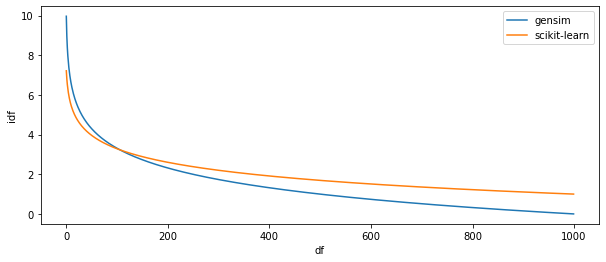

In [42]:
from gensim.models.tfidfmodel import df2idf
import matplotlib.pyplot as plt
%matplotlib inline

n = 1000
dfs = range(1, n+1)
_, ax = plt.subplots(figsize=(10,4))
ax.plot([df2idf(df, n) for df in dfs], label="gensim")
ax.plot([sk_df2idf(df, n) for df in dfs], label="scikit-learn")
ax.set(xlabel="df", ylabel="idf")
ax.legend();